In [16]:
## kutuphaneler
import glob, os
import sklearn as sk
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#veriyukleme
epilepsy=pd.read_csv("epilepsi.csv")

conditions=['base','age','seizure.rate','period']
X=epilepsy[conditions]
y=epilepsy['treatment']

In [17]:
#Train-Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)

In [18]:
#Algoritmalar ve parametre uygulamaları

#KNN ALGORİTMASI

from sklearn.neighbors import KNeighborsClassifier

print ("Training ...")
start = datetime.now()
knn = KNeighborsClassifier(n_neighbors=2,metric='minkowski')
knn.fit(X_train, y_train)
end = datetime.now()
c = end - start
print("KNN training took "+ str(c.microseconds) + " microseconds")


Training ...
KNN training took 5757 microseconds


In [19]:
print ("Testing:")
y_pred = knn.predict(X_test)
print (classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False))
print
print ("Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print
print ("Confusion matrix:")
print (confusion_matrix(y_test, y_pred))
print(" ")


Testing:
              precision    recall  f1-score   support

   Progabide       0.83      0.94      0.88        32
     placebo       0.91      0.78      0.84        27

    accuracy                           0.86        59
   macro avg       0.87      0.86      0.86        59
weighted avg       0.87      0.86      0.86        59

Accuracy: 0.864
Confusion matrix:
[[30  2]
 [ 6 21]]
 


In [20]:
#SVM ALGORİTMASI

from sklearn.svm import SVC
start = datetime.now()
svc=SVC(kernel="rbf",gamma="auto")
print ("Training ...")
svc.fit(X_train,y_train)
end = datetime.now()
c = end - start
print("SVM training took "+ str(c.microseconds) + " microseconds")

Training ...
SVM training took 10236 microseconds


In [21]:
print ("Testing:")
y_pred = svc.predict(X_test)
print (classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False))
print ("Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print
print ("Confusion matrix:")
print (confusion_matrix(y_test, y_pred))
print(" ")



Testing:
              precision    recall  f1-score   support

   Progabide       0.89      0.97      0.93        32
     placebo       0.96      0.85      0.90        27

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59

Accuracy: 0.915
Confusion matrix:
[[31  1]
 [ 4 23]]
 


In [22]:
#LOJİSTİK REGRESYON

from sklearn.linear_model import LogisticRegression

start = datetime.now()
logr=LogisticRegression(solver='lbfgs',C=50)
print ("Training ...")
logr.fit(X_train,y_train)
end = datetime.now()
c = end - start 
print("Logistic regression took "+ str(c.microseconds) + " microseconds")

Training ...
Logistic regression took 19552 microseconds


In [23]:
print ("Testing:")
y_pred = logr.predict(X_test)
print (classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False))
print
print ("Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print
print ("Confusion matrix:")
print (confusion_matrix(y_test, y_pred))
print("")

Testing:
              precision    recall  f1-score   support

   Progabide       0.59      0.62      0.61        32
     placebo       0.52      0.48      0.50        27

    accuracy                           0.56        59
   macro avg       0.55      0.55      0.55        59
weighted avg       0.56      0.56      0.56        59

Accuracy: 0.559
Confusion matrix:
[[20 12]
 [14 13]]



In [24]:
#NAIVE BAYES 

from sklearn.naive_bayes import GaussianNB

start = datetime.now()
gnb=GaussianNB()
print ("Training ...")
gnb.fit(X_train,y_train)
end = datetime.now()
c = start - end
print("Gaussian Naive Bayes training took "+ str(c.microseconds) + " microseconds")

Training ...
Gaussian Naive Bayes training took 994648 microseconds


In [25]:
print ("Testing:")
y_pred = gnb.predict(X_test)
print (classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False))
print
print ("Accuracy: %.3f" % accuracy_score(y_test, y_pred))
print
print ("Confusion matrix:")
print (confusion_matrix(y_test, y_pred))
print("")

Testing:
              precision    recall  f1-score   support

   Progabide       0.57      0.12      0.21        32
     placebo       0.46      0.89      0.61        27

    accuracy                           0.47        59
   macro avg       0.52      0.51      0.41        59
weighted avg       0.52      0.47      0.39        59

Accuracy: 0.475
Confusion matrix:
[[ 4 28]
 [ 3 24]]



## Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
np.set_printoptions(precision=2)


clf = KNeighborsClassifier(n_neighbors = 2, metric = "minkowski")
cv_scores = cross_val_score(clf, X, y)

print('Çapraz Sağlama skor (3-kat):', cv_scores)
print('Ortalama çapraz sağlama skor (3-kat): {:.3f}'
     .format(np.mean(cv_scores)))

Çapraz Sağlama skor (3-kat): [0.53 0.62 0.53]
Ortalama çapraz sağlama skor (3-kat): 0.555


C:\Users\Havva\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [27]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=2)

In [28]:
print(train_scores)

[[0.65 0.66]
 [0.97 0.97]
 [1.   1.  ]
 [1.   1.  ]]


In [29]:
print(test_scores)

[[0.56 0.48]
 [0.57 0.61]
 [0.53 0.53]
 [0.53 0.53]]


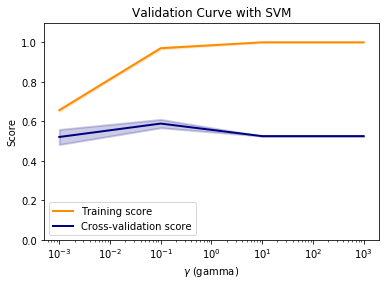

In [30]:
import matplotlib.pyplot as plt
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()